# Pythonプログラミング発展
このチュートリアルではpythonのクラスについて理解を深めます。  
私を含めた初心者は、ライブラリを使うときに、外側から何らかのクラスやメソッドに触れはしますが、普段のプログラミングでは関数ばかり使いがちです。  
しかし、ChainerやPyTorchでモデルを記述する際にはクラスが登場しますので、クラスを自分で定義できないといけません。  
面食らわないためにクラスについて簡単に学んでおきましょう。

※ 私はあまりプログラミングの用語（オブジェクト指向など）には詳しくないので、以下ではおそらく雑な言葉遣いをしています。  
※ 間違いがあれば指摘してください。

説明では「selfって何？」とかいろいろと端折っていますが、詳しくは公式のドキュメントなど参照してください。  
https://docs.python.jp/3/tutorial/classes.html  
http://www.python-izm.com/contents/application/class.shtml

---

# クラスとは？

そもそもクラスってなんでしょうか。関数となにが違うのでしょうか。  

関数は、何らかの入力を受けとり、それに処理を加えて出力します。  
たとえば、

In [1]:
def add_one(x):
    return x+1

print(add_one(3))
print(add_one(3.1415))

4
4.141500000000001


↑はなんらかの数字(intでもfloatでも)を受け取り、プラス１した値を返してくれる関数です。

一方、**クラス（データ型）**は、何らかの**要素・情報の集まり（属性）**と**それに対する処理（メソッド）**のセットからなります。  
[Pythonスタートブック](https://www.amazon.co.jp/Pythonスタートブック-辻-真吾/dp/4774142298/ref=sr_1_1?s=books&ie=UTF8&qid=1507012270&sr=1-1&keywords=pythonスタートブック)では、料理における素材と調理道具のセットという比喩で説明されていました。

いつもなんとなく使っている文字列などもstrというオブジェクトで、メソッドを持っています。

In [2]:
type('Abc')

str

In [3]:
'Abc'.lower()

'abc'

↑では、strオブジェクトに付随するlowerメソッドを使って、'abc'というstrオブジェクトに変換しています。

strはpythonに予め用意されているクラスですが、クラスは自分でも作ることができます。  

たとえば、Chainerでニューラルネットワークのモデルを記述する際は、様々なNNレイヤーを要素としてオブジェクト内に保持しておき、  
メソッドで、それらをいかに組み合わせて計算するかを定義します。

以下では、pythonのクラスの感覚をつかむために、クラスを使ってサイコロを作ってみましょう。

## クラスを使ってサイコロを作る

一般的な６面ダイスを考えます。  

クラスを書くときは、今自分が実装したいものの、属性と、それに対する処理を考えるとよいでしょう。  
サイコロに関して言うならば、　　

- 属性
    - 1から6の数字を持つ面が、それぞれ一個ずつある。
- 処理
    - サイコロを転がして、ランダムに面の中のどれか一つの数字を出力する。

これらをクラスで表現します。

In [4]:
# randomをインポート
import random


class Dice:
    
    # サイコロの属性を定義する
    def __init__(self):
        print('サイコロ用意したよ！')
        self.surface = list(range(1, 7)) # 1から6までの数字のリスト
    
    # サイコロに加える処理（メソッド）を定義する
    def throw(self):
        return random.choice(self.surface)

属性として1~6までの数字のリストを持ち、メソッドとしてそこからrandomに一つ選んで出力する処理を持つクラス**Dice**を定義しました。  
`def __init__`は、オブジェクトを生成したときに実行される処理で、大体ここで属性を記述します。  
メソッドの第一引数にselfを入れるのを忘れないように。

では、実際にDiceオブジェクトを作って、サイコロをを投げて遊んでみましょう。

In [5]:
dice = Dice()

サイコロ用意したよ！


In [6]:
dice.surface

[1, 2, 3, 4, 5, 6]

用意してくれました。ちゃんと６面あります。  
とりあえず１０回投げてみます。

In [7]:
for i in range(10):
    print(dice.throw())

1
6
5
5
1
5
1
3
5
4


計算機上のサイコロにおいてはサイコロの形に制約はなく、マシンが許す限り何面ダイスでも作ることができます。  
サイコロを用意する時に数字を入力して、面の数を決められるようにDiceを改良しましょう。

In [8]:
class Dice:
    def __init__(self, n):
        print('{}面ダイスを用意したよ！'.format(n))
        self.surface = list(range(1, n+1))
    
    def throw(self):
        return random.choice(self.surface)

17面ダイスを作ってみます。

In [9]:
dice = Dice(17)

17面ダイスを用意したよ！


In [10]:
dice.surface

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [11]:
for i in range(10):
    print(dice.throw())

11
8
11
10
13
17
10
3
15
11


もちろん、メソッドを何個も用意することも可能です。  
Diceに、「任意の回数だけthrowを行い、出た目の数を合計する処理」を追加してみましょう。

In [12]:
class Dice:
    def __init__(self, n):
        print('{}面ダイスを用意したよ！'.format(n))
        self.surface = list(range(1, n+1))
    
    def throw(self):
        return random.choice(self.surface)
    
    def n_throw_sum(self, n_throw):
        output_surfaces = [self.throw() for i in range(n_throw)]
        return sum(output_surfaces)

In [13]:
dice = Dice(6)

6面ダイスを用意したよ！


In [14]:
dice.n_throw_sum(100)

323

なんか出ました。  
１００回投げて出ための合計の様子を、１０個分調べてみます。

In [15]:
for i in range(10):
    print(dice.n_throw_sum(100))

318
356
367
365
389
369
346
379
361
319


１回だけ振ったときの目の期待値が3.5なので、だいたいこんなもんですかね。

## クラスの継承について

クラスを定義することでサイコロが振れるようになりました。  
次は、クラスの継承について学びます。  
継承を行うことで、元のクラスを土台に、属性やメソッドを付け足すことができます。  
継承はChainerでも、モデルとモデルを結びつける際に行われます。

継承は、最初はわりととっつきにくいかもしれません。以下のサイトなども参考になるでしょう。  
http://memopy.hatenadiary.jp/entry/2017/06/10/152057

今回は、サイコロの振る舞いを調べる記録の役割を果たす**Dice_note**というクラスを作ってみましょう。

In [16]:
class Dice_Note(Dice): # ベースとなるクラス（スーパークラス）を引数で指定します。
    def __init__(self, n):
        super().__init__(n) # python3ではsuper()を使用して、スーパークラスを参照できます。ここではDiceの__init__を参照しています。
                            # super()で参照する場合、引数にselfはいらないことを注意してください。
        
        self.property = '{}面ダイスのノートだよ！'.format(n)

`super()`で`Dice.__init__`を参照することで、DiceのもろもろがDice_Noteにも引き継がれます。

In [17]:
dice_note = Dice_Note(6) # 6面ダイスの振る舞いを調べるノート作成します。

6面ダイスを用意したよ！


`super.__init__()`によって、`Dice.__init__(self, 6)`が呼び出され、  
'6面ダイスを用意したよ！'という文字列がprintされました。

In [18]:
dice_note.property

'6面ダイスのノートだよ！'

もちろん、Dice_Noteの属性であるpropertyにも、ちゃんと、Dice_Noteで定義した情報が入っています。  
Diceの属性・メソッドはどうでしょうか。

In [19]:
dice_note.surface

[1, 2, 3, 4, 5, 6]

In [20]:
dice_note.throw()

5

In [21]:
dice_note.n_throw_sum(100)

383

Diceの属性・メソッドが、ちゃんとDice_Noteに引き継がれていることがわかります。  
では、異常を踏まえて、本格的にサイコロの振る舞いを調べるためのクラスDice_Noteを作っていきます。

Dice.n_throw_sumは、サイコロの処理というより、サイコロの出た目の記録であると解釈し、  
出た目の合計の出力はDice_Noteのメソッドに移します。

In [22]:
# Diceの再定義（n_throw_sumを削る）
class Dice:
    def __init__(self, n):
        print('{}面ダイスを用意したよ！'.format(n))
        self.surface = list(range(1, n+1))
    
    def throw(self):
        return random.choice(self.surface)

# Dice_Note
class Dice_Note(Dice):
    def __init__(self, n):
        super().__init__(n)
        self.property = '{}面ダイスのノートだよ！'.format(n)
        
    def n_throw_sum(self, n_throw):
        output_surfaces = [self.throw() for i in range(n_throw)]
        return sum(output_surfaces)

In [23]:
dice_note = Dice_Note(6)

6面ダイスを用意したよ！


In [24]:
dice_note.n_throw_sum(100)

353

無事動きました。  
これだけでは、クラスの構成を組み替えただけなので、Dice_Noteにメソッドを増やしましょう。  

サイコロの出目の和の分布を調べる機能を追加してみます。

In [25]:
import numpy as np

class Dice_Note(Dice):
    def __init__(self, n):
        super().__init__(n)
        self.property = '{}面ダイスのノートだよ！'.format(n)
        
    def n_throw_sum(self, n_throw):
        output_surfaces = [self.throw() for i in range(n_throw)]
        return sum(output_surfaces)
    
    def n_throw_sum_dist(self, n_samples, n_throw):
        samples = [self.n_throw_sum(n_throw) for i in range(n_samples)]
        print('mean: {}'.format(np.mean(samples)))
        print('var : {}'.format(np.var(samples)))
        return samples

n_throw回ダイスを投げる指向をn_samples回行って、合計値の平均と分散を算出しつつ、値のリストを返す`n_throw_sum_dist`メソッドを追加しました。

In [26]:
dice_note = Dice_Note(6)

6面ダイスを用意したよ！


In [27]:
samples = dice_note.n_throw_sum_dist(n_samples=50, n_throw=100)

mean: 354.3
var : 294.36999999999995


In [28]:
print(samples)

[374, 343, 342, 351, 334, 349, 348, 354, 352, 355, 351, 351, 346, 340, 351, 390, 365, 321, 377, 347, 329, 334, 363, 356, 390, 359, 339, 320, 377, 336, 349, 365, 347, 396, 360, 351, 357, 337, 370, 367, 373, 348, 338, 366, 336, 356, 391, 363, 340, 361]


うまく機能しているようです。

では、samplesの中身を可視化してみましょう。  
ヒストグラムを描いてみます。

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

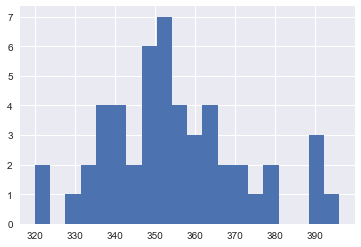

In [30]:
plt.hist(samples, bins=20)
plt.show()

ヒストグラムが表示されました。
さらにサンプル数を増やしてみましょう。

In [31]:
samples = dice_note.n_throw_sum_dist(n_samples=500, n_throw=100)

mean: 349.872
var : 314.67961599999995


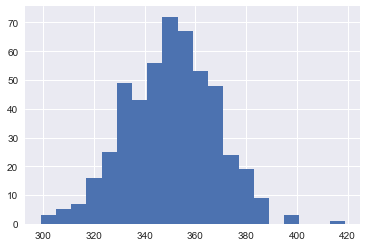

In [32]:
plt.hist(samples, bins=20)
plt.show()

In [33]:
samples = dice_note.n_throw_sum_dist(n_samples=5000, n_throw=100)

mean: 349.878
var : 298.853916


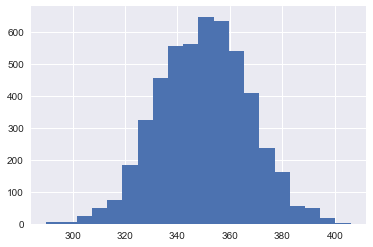

In [34]:
plt.hist(samples, bins=20)
plt.show()

ヒストグラムが釣り鐘型になっており、ガウス分布に近づいていっているのがわかります。  
複数の確率変数の和の分布がガウス分布に近づいていくという中心極限定理が再現できています。

---

# まとめ

お疲れ様でした。  
pythonのクラスと継承について解説しました。  
これらの知識を踏まえて、次はいよいよ深層学習フレームワークであるChainerに触っていきます。